In [1]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.preprocessing import label_binarize
from sklearn.utils import compute_sample_weight
from sklearn.metrics import average_precision_score

import numpy as np
import lightgbm as lgb

In [2]:
import hdbscan

In [2]:
# X_train = np.load('XGB/X_train.npy')
# X_test = np.load('XGB/X_test.npy')

# y_train = np.load('XGB/y_train.npy')
# y_test = np.load('XGB/y_test.npy')

X_train = np.load('XGB/DaKa/X_train.npy')
X_test = np.load('XGB/DaKa/X_test.npy')

y_train = np.load('XGB/DaKa/y_train.npy')
y_test = np.load('XGB/DaKa/y_test.npy')

In [275]:
X_train_0_5 = np.load('XGB/DaKa/X_train_0.5.npy')
X_test_0_5 = np.load('XGB/DaKa/X_test_0.5.npy')

In [276]:
X_train.mean(axis=0)

array([2.3659773e-01, 4.4336742e-01, 4.5355168e-01, ..., 5.4421509e+02,
       5.0506088e+02, 3.4705191e+02], dtype=float32)

In [277]:
X_train_0_5.mean(axis=0)

array([2.3285644e-01, 4.1243541e-01, 1.2231993e+03, ..., 4.7595963e+00,
       4.6099315e+00, 4.3373146e+00], dtype=float32)

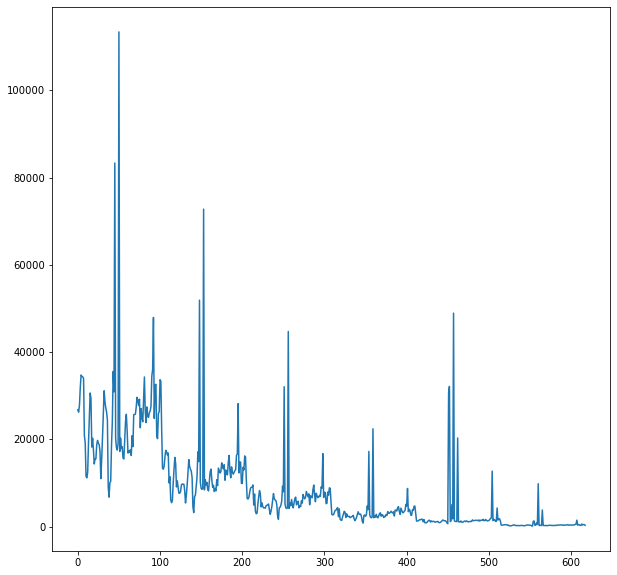

In [286]:
plt.plot(X_train[:, 13:631].mean(axis=0))

In [293]:
X_train_0_5[:, 106:106+618].reshape(-1, 6).mean(axis=0)

array([ 9971.776 , 10302.535 , 10436.074 , 11313.959 , 11466.0625,
       10171.754 ], dtype=float32)

In [294]:
X_train[:, 13:631].reshape(-1, 6).mean(axis=0)

array([8129.2227, 8279.523 , 8929.146 , 8866.226 , 8350.608 , 7991.142 ],
      dtype=float32)

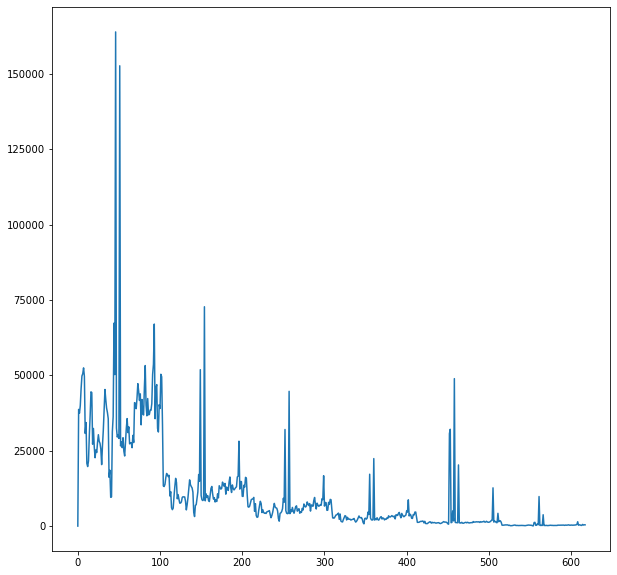

In [287]:
plt.plot(X_train_0_5[:, 106:106+618].mean(axis=0))

In [139]:
X_train[:, 1].mean(), X_train_0_5[:, 1].mean()

NameError: name 'X_train_0_5' is not defined

In [125]:
chans = 103

#PSD
# X_train_combined = np.concatenate((X_train[:, chans+3:chans*7+3], X_train_0_5[:, chans+3:chans*7+3]), axis=1)
# X_test_combined = np.concatenate((X_test[:, chans+3:chans*7+3], X_test_0_5[:, chans+3:chans*7+3]), axis=1)

#Corr
# X_train_combined = np.concatenate((X_train[:, :chans+3], X_train_0_5[:, :chans+3]), axis=1)
# X_test_combined = np.concatenate((X_test[:, :chans+3], X_test_0_5[:, :chans+3]), axis=1)

#Per chan
# X_train_combined = np.concatenate((X_train[:, chans*7+3:], X_train_0_5[:, chans*7+3:]), axis=1)
# X_test_combined = np.concatenate((X_test[:, chans*7+3:], X_test_0_5[:, chans*7+3:]), axis=1)

X_train = np.concatenate((X_train[:, :chans+3], X_train_0_5[:, chans+3:chans*7+3]), axis=1)#X_train[:, chans*7+3:]), axis=1)
X_test = np.concatenate((X_test[:, :chans+3], X_test_0_5[:, chans+3:chans*7+3]), axis=1)#X_test[:, chans*7+3:]), axis=1)

NameError: name 'X_train_0_5' is not defined

In [260]:
chans = 103

X_train = X_train[:, :631]
X_test = X_test[:, :631]
# X_train = X_train[:, -734-103:-734]
# X_test = X_test[:, -734-103:-734]
# X_train = np.concatenate((X_train[:, :-734-103], X_train[:, -734:-103]), axis=1)
# X_test = np.concatenate((X_test[:, :-734-103], X_test[:, -734:-103]), axis=1)
# X_train = np.concatenate((X_train[:, -734-103:-734], X_train[:, -103:]), axis=1)
# X_test = np.concatenate((X_test[:, -734-103:-734], X_test[:, -103:]), axis=1)

In [258]:
X_train.shape

(23039, 1262)

In [103]:
import pandas as pd

# Load file containing suitable channels and convert to list
df = pd.read_excel('Data/TrialPatientDaKa/Electrodes.xlsx', header=None)
valid_channels = df[0].tolist()

df = pd.read_excel('Data/TrialPatientDaKa/Electrode_mapping.xlsx')

valid_channels_mapped = []
for valid_channel in valid_channels:
    valid_channels_mapped.append("C" + str(int(df[df.Original == valid_channel].Mapped)))
    
valid_channels[-85]

'D1'

In [101]:
corrs = []

for i in range(103):
    corr = abs(np.corrcoef(y_train, X_train[:, -i])[0, 1])
    corrs.append(corr)
        
print(np.argsort(corrs))

[ 12  47  96   0   8  98  46  35  76  88  41  82  77   9  64   3   2  40
  31  27  24  30  16  21  36  10  97  39   6   1  22  11  43  87  25  94
  45  55  28  62  37  99  44  58 100  73  83  19  91  92  56  23   5 102
  29  34  63  48  71  50  93 101  32  72  78  13   4  18  26  53  90  17
  61  89   7  95  33  51  38  81  20  66  14  67  79  60  57  59  74  84
  70  86  52  75  80  68  54  15  69  49  85  65  42]


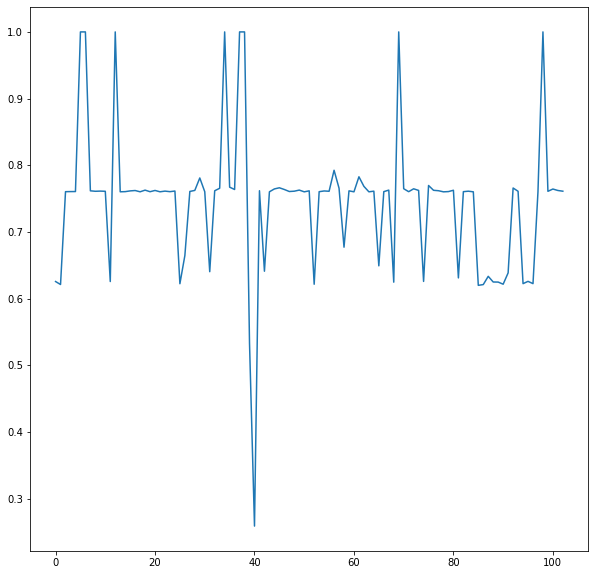

In [83]:
plt.plot(X_train[:, -103:].max(axis=0))

PSD: array([0.07254666, 0.08926564])
Corr: array([0.52609438, 0.41730185])
Chan features: array([0.04673956, 0.04144387])

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

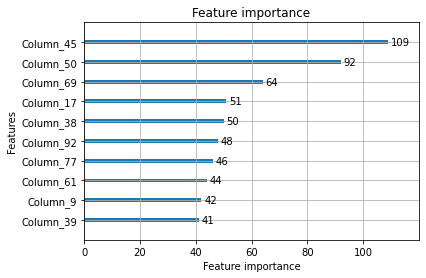

In [72]:
lgb.plot_importance(models[1], max_num_features=10)#, importance_type='gain')

In [574]:
model.feature_importances_.reshape(-1, 2).mean(axis=0)

array([0.04673956, 0.04144387])

In [571]:
importances = model.feature_importances_.reshape(-1, 2)
max_importances = []
for importance in importances:
    if importance.mean() > 0:
        max_importances.append(importance.argmax())
        
np.unique(np.array(max_importances), return_counts=True)

(array([0, 1]), array([58, 48]))

In [3]:
def add_detections(X, y, seconds_list=[60, 360]):
    
    X_features_list = [X]
    
    for seconds in seconds_list:
        y_detections = y[:seconds * (len(y) // seconds)].reshape(-1, seconds).sum(axis=-1)
        X_features_list.append(np.append(np.array([0] * seconds), np.repeat(y_detections, seconds))[:len(y)][:, np.newaxis])        

    return np.concatenate(X_features_list, axis=1)

X_train_detected = add_detections(X_train, y_train, seconds_list=[10, 60])
# X_test_detected = add_detections(X_test, y_test, seconds_list=[10, 60])

In [136]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [142]:
polynomial_features = PolynomialFeatures(degree=1,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X_train_detected[:, -1, np.newaxis], y_train_detected)

scores = pipeline.predict(X_test_detected[:, -1, np.newaxis])

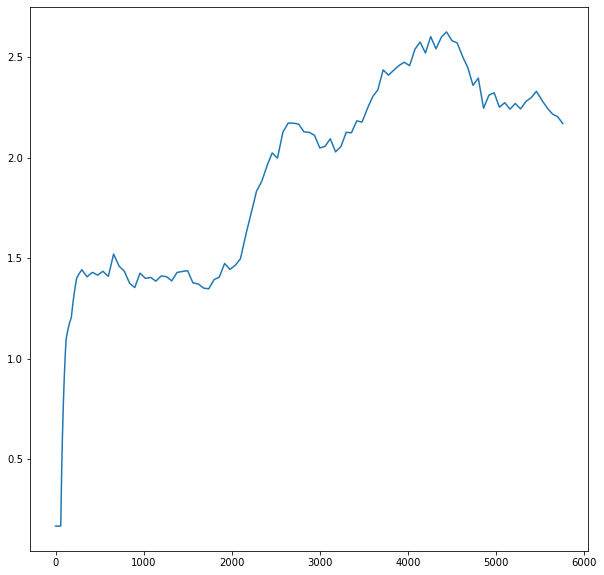

In [147]:
scores = pipeline.predict(X_test_detected[:, -1, np.newaxis])

import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

N = 600
cumsum, moving_aves = [0], []

for i, x in enumerate(scores, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
    else:
        moving_ave = cumsum[i] / i
    moving_aves.append(moving_ave)

plt.plot(moving_aves)

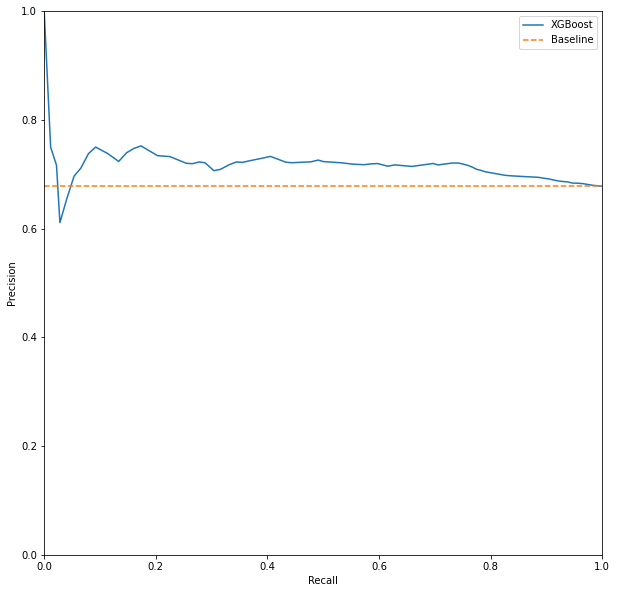

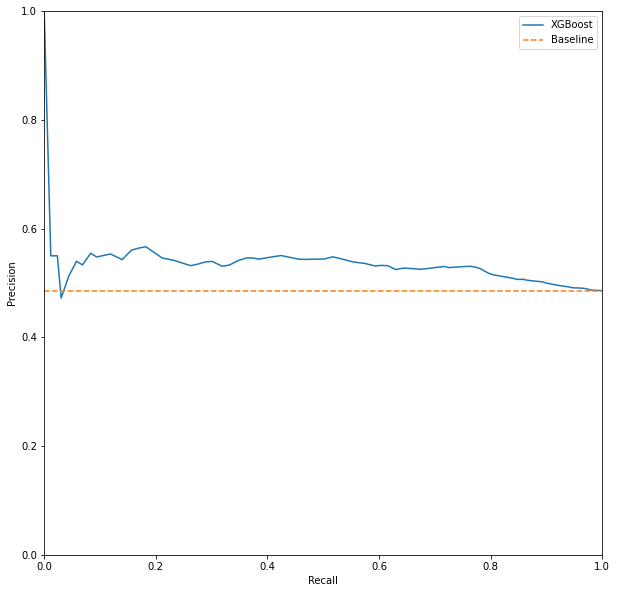

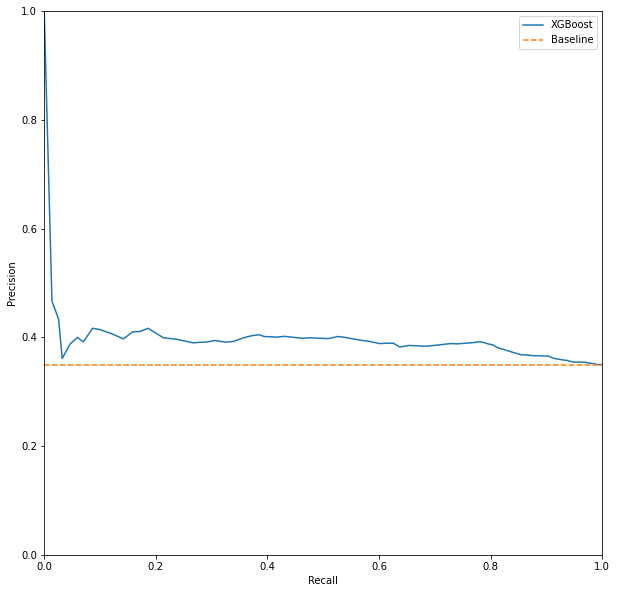

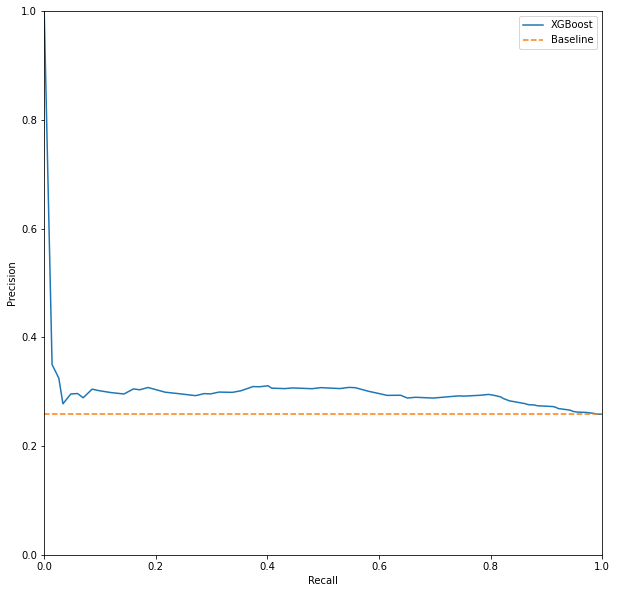

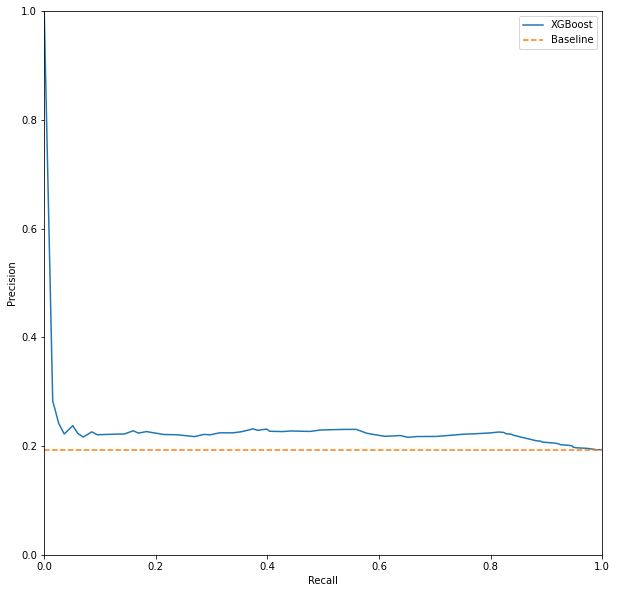

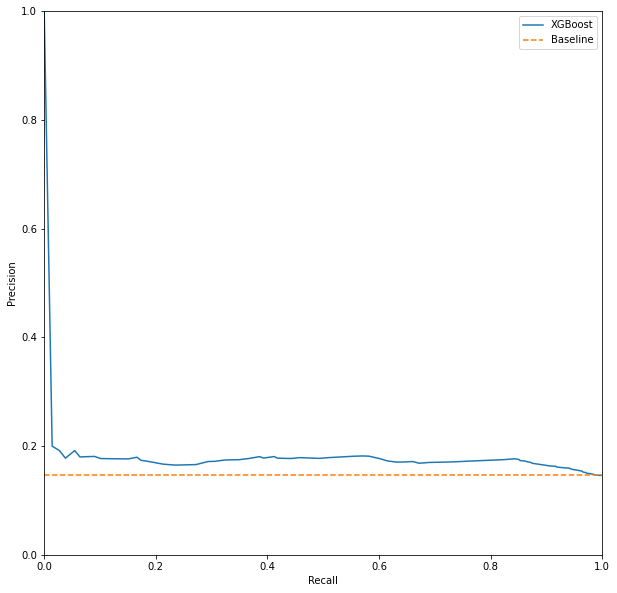

In [148]:
pr_curve(0, scores)
pr_curve(1, scores)
pr_curve(2, scores)
pr_curve(3, scores)
pr_curve(4, scores)
pr_curve(5, scores)

In [63]:
importances = [model.feature_importances_ for model in models[1:3]]

In [69]:
np.array(importances).mean(axis=0).argsort()[-10:][::-1]

array([50, 45, 69, 38, 43, 98, 32, 39, 61, 44])

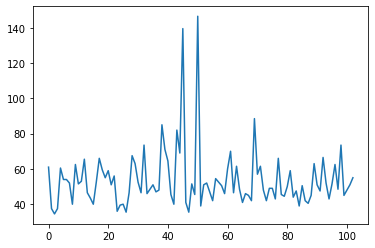

In [73]:
plt.plot(np.array(importances).mean(axis=0))

In [26]:
np.array(importances).mean()

3.2657278712509146

In [152]:
model.feature_importances_.argsort()[-20:][::-1]

array([372, 361, 470,  58, 475, 367, 420, 161, 414, 265, 166,  63, 269,
       264, 204, 302, 362, 307, 288, 300])

In [546]:
importances = model.feature_importances_.reshape(-1, 2)
max_importances = []
for importance in importances:
    if importance.mean() > 0:
        max_importances.append(importance.argmax())
        
np.unique(np.array(max_importances), return_counts=True)

(array([0, 1]), array([59, 62]))

In [550]:
model.feature_importances_.reshape(-1, 2).mean(axis=0)

array([0.07254666, 0.08926564])

In [511]:
model.feature_importances_[:-1].reshape(2, -1).argmax(axis=0).mean()

0.07119741100323625

In [526]:
np.append(y_train, y_test).mean()

3.2957394353970626

In [250]:
X_train.shape[1]/2

631.0

In [252]:
model.feature_importances_[13+631:13+618+631].reshape(103, 6).mean(axis=0)
# model.feature_importances_[psd_start:psd_end].reshape(103, 6).sum(axis=-1).argsort()[-10:][::-1]

array([2.32038835, 2.53398058, 2.11650485, 2.21359223, 2.74757282,
       2.68932039])

In [132]:
model.feature_importances_[3:621].reshape(103, 6).mean(axis=0)

array([108.78640777, 119.31067961, 114.80582524, 110.0776699 ,
       114.32038835, 106.72815534])

In [404]:
model.feature_importances_[psd_start:psd_end].reshape(103, 6)[:, 5].argsort()[-10:][::-1]

array([47, 24, 48, 57, 67, 50, 65, 36, 56, 44])

In [99]:
#corr_start = 0
#corr_end = 114
#model.feature_importances_[corr_start:corr_end][model.feature_importances_[corr_start:corr_end].argsort()[-10:][::-1]]

psd_start = 106
psd_end = psd_start + 618
model.feature_importances_[psd_start:psd_end][model.feature_importances_[psd_start:psd_end].argsort()[-10:][::-1]]

array([267, 220, 213, 211, 157, 150, 147, 146, 130, 130], dtype=int32)

In [540]:
roc_auc_score(y_test > 0, preds)

0.8078886792612319

In [631]:
from catboost import CatBoostRegressor


start = time.time()

model = CatBoostRegressor(eval_metric="RMSE", n_estimators=10000, learning_rate=1e-1) 

eval_set = [(X_test_detected, y_test)]
# eval_set = [(X_test, y_test > 0)]

model.fit(X_train_detected, y_train_detected, \
          early_stopping_rounds=100, eval_set=eval_set, \
          verbose=True)#, sample_weight=sample_weight)

print(time.time() - start)

0:	learn: 4.1006179	test: 3.1583809	best: 3.1583809 (0)	total: 169ms	remaining: 28m 13s
1:	learn: 4.0532993	test: 3.1180054	best: 3.1180054 (1)	total: 306ms	remaining: 25m 28s
2:	learn: 4.0164744	test: 3.0829612	best: 3.0829612 (2)	total: 395ms	remaining: 21m 56s
3:	learn: 3.9793809	test: 3.0351294	best: 3.0351294 (3)	total: 496ms	remaining: 20m 38s
4:	learn: 3.9518857	test: 2.9988281	best: 2.9988281 (4)	total: 590ms	remaining: 19m 39s
5:	learn: 3.9285875	test: 2.9728135	best: 2.9728135 (5)	total: 681ms	remaining: 18m 54s
6:	learn: 3.9062639	test: 2.9554013	best: 2.9554013 (6)	total: 765ms	remaining: 18m 11s
7:	learn: 3.8872849	test: 2.9342491	best: 2.9342491 (7)	total: 845ms	remaining: 17m 35s
8:	learn: 3.8664743	test: 2.9170966	best: 2.9170966 (8)	total: 930ms	remaining: 17m 12s
9:	learn: 3.8515783	test: 2.9091385	best: 2.9091385 (9)	total: 1.03s	remaining: 17m 10s
10:	learn: 3.8344889	test: 2.9009454	best: 2.9009454 (10)	total: 1.11s	remaining: 16m 49s
11:	learn: 3.8205565	test: 2.8

94:	learn: 3.5016630	test: 2.9266621	best: 2.8613512 (27)	total: 7.69s	remaining: 13m 21s
95:	learn: 3.4978074	test: 2.9261412	best: 2.8613512 (27)	total: 7.76s	remaining: 13m 20s
96:	learn: 3.4951666	test: 2.9271102	best: 2.8613512 (27)	total: 7.84s	remaining: 13m 20s
97:	learn: 3.4928691	test: 2.9263161	best: 2.8613512 (27)	total: 7.91s	remaining: 13m 19s
98:	learn: 3.4908468	test: 2.9264589	best: 2.8613512 (27)	total: 7.99s	remaining: 13m 19s
99:	learn: 3.4883774	test: 2.9283524	best: 2.8613512 (27)	total: 8.07s	remaining: 13m 18s
100:	learn: 3.4861177	test: 2.9281997	best: 2.8613512 (27)	total: 8.15s	remaining: 13m 18s
101:	learn: 3.4825594	test: 2.9309285	best: 2.8613512 (27)	total: 8.22s	remaining: 13m 17s
102:	learn: 3.4803944	test: 2.9300582	best: 2.8613512 (27)	total: 8.29s	remaining: 13m 17s
103:	learn: 3.4780908	test: 2.9301937	best: 2.8613512 (27)	total: 8.37s	remaining: 13m 16s
104:	learn: 3.4762368	test: 2.9307502	best: 2.8613512 (27)	total: 8.44s	remaining: 13m 15s
105:	

In [4]:
###### def rmsle(predt: np.ndarray, dtrain: xgb.DMatrix) -> Tuple[str, float]:
#     ''' Root mean squared log error metric.'''
#     y = dtrain.get_label()
#     predt[predt < -1] = -1 + 1e-6
#     elements = np.power(np.log1p(y) - np.log1p(predt), 2)
#     return 'PyRMSLE', float(np.sqrt(np.sum(elements) / len(y)))

def recall_at_precision(y_true, y_pred):
    
    precision, recall, thresholds = precision_recall_curve(y_true > thresh, y_pred)
    precision_of_60 = np.argmax(precision>0.6)
    rec_at_prec = recall[precision_of_60]
    
    return 'rec_at_prec', rec_at_prec, True    
    
def auprc(y_true, y_pred):
    auprc = average_precision_score(y_true > thresh, y_pred)
    return 'auprc', auprc, True

def auroc(y_true, y_pred):
    auroc = roc_auc_score(y_true > thresh, y_pred)
    return 'auroc', auroc, True

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.5, shuffle=False)

In [29]:
# X_train, X_test = X_train_detected[:14400], X_train_detected[14400:19440]
# y_train, y_test = y_train[:14400], y_train[14400:19440]

# X_train, X_test = X_train_detected[:14400], X_train_detected[18000:21600]
# y_train, y_test = y_train[:14400], y_train[18000:21600]

X_train, X_test = X_train_detected[:50400], X_train_detected[54000:72000]
y_train, y_test = y_train[:50400], y_train[54000:72000]

In [53]:
X_train_detected[:, 111:111+108].reshape(-1, 6)[:, [0, 2]].mean(axis=0)

array([56586.02514838, 68422.40891712])

In [57]:
scores

[defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.35326498868421363),
                           ('auroc', 0.5617710278507305)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.37397107789948547),
                           ('auroc', 0.6080465734036766)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.2750794930580768),
                           ('auroc', 0.5800099372770877)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.2521580996409872),
                           ('auroc', 0.5162243133815066)])})]

In [10]:
scores

[defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.45859983553628075),
                           ('auroc', 0.6736779266234609)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.4820193853421301),
                           ('auroc', 0.7016942534471924)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.4080792987930819),
                           ('auroc', 0.7098476448161357)])}),
 defaultdict(collections.OrderedDict,
             {'valid_0': OrderedDict([('auprc', 0.4358711659300701),
                           ('auroc', 0.7317716764297328)])})]

In [ ]:
1.0096182664818953
0.9311643570574357
1.0291601411829767
1.8028086692454757

In [38]:
X_train_detected[:, -2-103:-2].max()

1.0

In [49]:
from lightgbm import plot_tree
import graphviz

# plot_tree(model, figsize=(10, 50))

In [56]:
from lightgbm import LGBMRegressor
hyper_params = {
    'objective': 'regression',
    'task': 'train',
    'boosting_type': 'gbdt',
    'metric': [auprc],
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

scores = []
models = []

# max_index = 72000
max_index = 22000
folds = 4
thresh = 5

for i in range(folds):
    
    X_train_fold = np.concatenate((X_train_detected[:i*int(max_index/folds)], \
                                   X_train_detected[(i+1)*int(max_index/folds):max_index]), axis=0)
    X_test_fold = X_train_detected[i*int(max_index/folds):(i+1)*int(max_index/folds)]
    y_train_fold = np.concatenate((y_train[:i*int(max_index/folds)], \
                                   y_train[(i+1)*int(max_index/folds):max_index]), axis=0)
    y_test_fold = y_train[i*int(max_index/folds):(i+1)*int(max_index/folds)]
    
    #     delta_alpha = X_test_fold[:, 111:111+108].reshape(-1, 6)[:, [0, 2]].mean(axis=0)
    #     delta_alpha = X_test_fold[:, 13:13+108].reshape(-1, 6)[:, [0, 2]].mean(axis=0)
    
    #     print(delta_alpha[1] / delta_alpha[0])
    
    
    model = LGBMRegressor(**hyper_params)
    
    eval_set = [(X_test_fold[:, -2-103:-2], y_test_fold)]

    fitted_model = model.fit(X_train_fold[:, -2-103:-2], y_train_fold, eval_metric=[auprc, auroc], \
              early_stopping_rounds=200, eval_set=eval_set, \
              verbose=True)
    
    scores.append(fitted_model.best_score_)
    models.append(fitted_model)

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x16f6ae430>
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] Unknown parameter: 0x16f6ae430>
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Wa

[52]	valid_0's auprc: 0.351877	valid_0's auroc: 0.558082
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	valid_0's auprc: 0.35178	valid_0's auroc: 0.558214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	valid_0's auprc: 0.35136	valid_0's auroc: 0.557339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	valid_0's auprc: 0.351656	valid_0's auroc: 0.557644
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	valid_0's auprc: 0.351911	valid_0's auroc: 0.557664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	valid_0's auprc: 0.352259	valid_0's auroc: 0.558086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[58]	valid_0's auprc: 0.352497	valid_0's auroc: 0.557877
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[59]	valid_0's auprc: 0.35272	valid_0's auroc: 0.557835
[LightGBM] [Warning] N

[120]	valid_0's auprc: 0.35103	valid_0's auroc: 0.552099
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[121]	valid_0's auprc: 0.351143	valid_0's auroc: 0.552086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[122]	valid_0's auprc: 0.351125	valid_0's auroc: 0.55243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[123]	valid_0's auprc: 0.351602	valid_0's auroc: 0.552661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[124]	valid_0's auprc: 0.352243	valid_0's auroc: 0.552794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[125]	valid_0's auprc: 0.352406	valid_0's auroc: 0.552684
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[126]	valid_0's auprc: 0.35285	valid_0's auroc: 0.552997
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[127]	valid_0's auprc: 0.353012	valid_0's auroc: 0.553105
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[196]	valid_0's auprc: 0.353059	valid_0's auroc: 0.554591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[197]	valid_0's auprc: 0.353322	valid_0's auroc: 0.554769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[198]	valid_0's auprc: 0.353679	valid_0's auroc: 0.555103
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[199]	valid_0's auprc: 0.353208	valid_0's auroc: 0.554874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's auprc: 0.35329	valid_0's auroc: 0.554866
[201]	valid_0's auprc: 0.35266	valid_0's auroc: 0.554817
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[202]	valid_0's auprc: 0.352996	valid_0's auroc: 0.555338
[203]	valid_0's auprc: 0.352653	valid_0's auroc: 0.555126
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[204]	valid_0

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] Unknown parameter: 0x16f6ae430>
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x16f6ae430>
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Cu

[58]	valid_0's auprc: 0.367887	valid_0's auroc: 0.607097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[59]	valid_0's auprc: 0.368706	valid_0's auroc: 0.607473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's auprc: 0.368718	valid_0's auroc: 0.60699
[61]	valid_0's auprc: 0.36781	valid_0's auroc: 0.606461
[62]	valid_0's auprc: 0.367605	valid_0's auroc: 0.606833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[63]	valid_0's auprc: 0.367163	valid_0's auroc: 0.606897
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[64]	valid_0's auprc: 0.366513	valid_0's auroc: 0.607339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[65]	valid_0's auprc: 0.36657	valid_0's auroc: 0.607701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[66]	valid_0's auprc: 0.366695	valid_0's auroc: 0.607391
[LightGBM] [Warning] No further splits w

[122]	valid_0's auprc: 0.359937	valid_0's auroc: 0.599622
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[123]	valid_0's auprc: 0.359778	valid_0's auroc: 0.599012
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[124]	valid_0's auprc: 0.359773	valid_0's auroc: 0.599129
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[125]	valid_0's auprc: 0.360122	valid_0's auroc: 0.599429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[126]	valid_0's auprc: 0.35997	valid_0's auroc: 0.598776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[127]	valid_0's auprc: 0.360547	valid_0's auroc: 0.598928
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[128]	valid_0's auprc: 0.360558	valid_0's auroc: 0.598995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[129]	valid_0's auprc: 0.360083	valid_0's auroc: 0.598869
[LightGBM] [

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[193]	valid_0's auprc: 0.351839	valid_0's auroc: 0.591401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[194]	valid_0's auprc: 0.351478	valid_0's auroc: 0.591315
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[195]	valid_0's auprc: 0.351444	valid_0's auroc: 0.59128
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[196]	valid_0's auprc: 0.351427	valid_0's auroc: 0.591329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[197]	valid_0's auprc: 0.35159	valid_0's auroc: 0.591522
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[198]	valid_0's auprc: 0.351715	valid_0's auroc: 0.591747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[199]	valid_0's auprc: 0.351606	valid_0's auroc: 0.591786
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x16f6ae430>
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] Unknown parameter: 0x16f6ae430>
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[58]	valid_0's auprc: 0.269638	valid_0's auroc: 0.572704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[59]	valid_0's auprc: 0.2696	valid_0's auroc: 0.573823
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's auprc: 0.270535	valid_0's auroc: 0.574247
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[61]	valid_0's auprc: 0.270105	valid_0's auroc: 0.573927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[62]	valid_0's auprc: 0.269086	valid_0's auroc: 0.573782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[63]	valid_0's auprc: 0.270081	valid_0's auroc: 0.574539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[64]	valid_0's auprc: 0.269395	valid_0's auroc: 0.573826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[65

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[125]	valid_0's auprc: 0.27074	valid_0's auroc: 0.575914
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[126]	valid_0's auprc: 0.270771	valid_0's auroc: 0.575803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[127]	valid_0's auprc: 0.271079	valid_0's auroc: 0.576057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[128]	valid_0's auprc: 0.270932	valid_0's auroc: 0.575647
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[129]	valid_0's auprc: 0.271392	valid_0's auroc: 0.575996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[130]	valid_0's auprc: 0.271796	valid_0's auroc: 0.575828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[131]	valid_0's auprc: 0.273071	valid_0's auroc: 0.576878
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[190]	valid_0's auprc: 0.266387	valid_0's auroc: 0.567605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[191]	valid_0's auprc: 0.266187	valid_0's auroc: 0.56742
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[192]	valid_0's auprc: 0.266336	valid_0's auroc: 0.567922
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[193]	valid_0's auprc: 0.266413	valid_0's auroc: 0.568161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[194]	valid_0's auprc: 0.266845	valid_0's auroc: 0.568505
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[195]	valid_0's auprc: 0.266958	valid_0's auroc: 0.568051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[196]	valid_0's auprc: 0.266475	valid_0's auroc: 0.568115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[197]	valid_0's auprc: 0.266517	valid_0's auroc: 0.56866
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[257]	valid_0's auprc: 0.265048	valid_0's auroc: 0.567367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[258]	valid_0's auprc: 0.265921	valid_0's auroc: 0.568348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[259]	valid_0's auprc: 0.266046	valid_0's auroc: 0.568518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[260]	valid_0's auprc: 0.266004	valid_0's auroc: 0.568778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[261]	valid_0's auprc: 0.265832	valid_0's auroc: 0.568432
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[262]	valid_0's auprc: 0.266026	valid_0's auroc: 0.56876
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[263]	valid_0's auprc: 0.265438	valid_0's auroc: 0.568661
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] Unknown parameter: 0x16f6ae430>
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: auprc
[LightGBM] [Warning] Unknown parameter: at
[LightGBM] [Warning] Unknown parameter: 0x16f6ae430>
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Cu

[69]	valid_0's auprc: 0.246297	valid_0's auroc: 0.506849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's auprc: 0.246054	valid_0's auroc: 0.50665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	valid_0's auprc: 0.246213	valid_0's auroc: 0.507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's auprc: 0.246108	valid_0's auroc: 0.506318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's auprc: 0.245964	valid_0's auroc: 0.506351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	valid_0's auprc: 0.246351	valid_0's auroc: 0.50652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	valid_0's auprc: 0.24643	valid_0's auroc: 0.50655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	valid_0's auprc: 0.246414	valid_0's auroc: 0.506613
[LightGBM] [Warning] No fu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[136]	valid_0's auprc: 0.250312	valid_0's auroc: 0.514589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[137]	valid_0's auprc: 0.250134	valid_0's auroc: 0.514474
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[138]	valid_0's auprc: 0.250229	valid_0's auroc: 0.515427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[139]	valid_0's auprc: 0.250214	valid_0's auroc: 0.515306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[140]	valid_0's auprc: 0.250589	valid_0's auroc: 0.515073
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[141]	valid_0's auprc: 0.250435	valid_0's auroc: 0.514798
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[142]	valid_0's auprc: 0.250608	valid_0's auroc: 0.514782
[143]	valid_0's auprc: 0.250692	valid_0's auroc: 0.514598
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[202]	valid_0's auprc: 0.250992	valid_0's auroc: 0.511748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[203]	valid_0's auprc: 0.251093	valid_0's auroc: 0.511662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[204]	valid_0's auprc: 0.250904	valid_0's auroc: 0.511535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[205]	valid_0's auprc: 0.251072	valid_0's auroc: 0.511604
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[206]	valid_0's auprc: 0.250991	valid_0's auroc: 0.511634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[207]	valid_0's auprc: 0.251254	valid_0's auroc: 0.511574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[208]	valid_0's auprc: 0.251129	valid_0's auroc: 0.51167
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[271]	valid_0's auprc: 0.251569	valid_0's auroc: 0.514709
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[272]	valid_0's auprc: 0.251496	valid_0's auroc: 0.514378
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[273]	valid_0's auprc: 0.251496	valid_0's auroc: 0.514134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[274]	valid_0's auprc: 0.251398	valid_0's auroc: 0.514039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[275]	valid_0's auprc: 0.251444	valid_0's auroc: 0.514021
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[276]	valid_0's auprc: 0.251521	valid_0's auroc: 0.514197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[277]	valid_0's auprc: 0.250797	valid_0's auroc: 0.513987
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[345]	valid_0's auprc: 0.24925	valid_0's auroc: 0.51143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[346]	valid_0's auprc: 0.249241	valid_0's auroc: 0.511115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[347]	valid_0's auprc: 0.249095	valid_0's auroc: 0.51102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[348]	valid_0's auprc: 0.248722	valid_0's auroc: 0.510933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[349]	valid_0's auprc: 0.248733	valid_0's auroc: 0.5107
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[350]	valid_0's auprc: 0.248802	valid_0's auroc: 0.510872
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[351]	valid_0's auprc: 0.248642	valid_0's auroc: 0.510426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[421]	valid_0's auprc: 0.250121	valid_0's auroc: 0.511981
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[422]	valid_0's auprc: 0.249696	valid_0's auroc: 0.511873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[423]	valid_0's auprc: 0.250218	valid_0's auroc: 0.511866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[424]	valid_0's auprc: 0.250221	valid_0's auroc: 0.511918
[425]	valid_0's auprc: 0.249879	valid_0's auroc: 0.51148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[426]	valid_0's auprc: 0.249943	valid_0's auroc: 0.51155
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[427]	valid_0's auprc: 0.24944	valid_0's auroc: 0.511613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[428]	valid_0's auprc: 0.249669	valid_0's auroc: 0.511788
[LightGBM] [Wa

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((50400, 1950), (50400,), (18000, 1950), (18000,))

In [85]:
(y_train > 6).sum() / len(y_train)

0.19905377837579757

In [90]:
from lightgbm import LGBMRegressor

import time

start = time.time()

thresh = 5

hyper_params = {
    'objective': 'regression',
    'task': 'train',
    'boosting_type': 'gbdt',
#     'metric': [auprc],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100,#000,
    "n_estimators": 1000
}

model = LGBMRegressor(**hyper_params)

eval_set = [(X_test, y_test)]

model.fit(X_train, y_train, eval_metric=[auprc, auroc], \
          early_stopping_rounds=200, eval_set=eval_set, \
          verbose=True)

# eval_set = [(X_test, y_test)]

# model.fit(X_train, y_train, eval_metric=auprc, \
#           early_stopping_rounds=200, eval_set=eval_set, \
#           verbose=True)

print(time.time() - start)

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.221974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] fe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l2: 9.1676
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 9.1676
24.479409217834473


In [10]:
# preds = model.predict(X_test)
preds = model.predict(X_test)

In [12]:
average_precision_score(y_test > 0, preds)

0.5844492201722864

In [13]:
roc_auc_score(y_test > 5, preds)

0.7684931408482205

In [153]:
X_test.shape

(5040, 1367)

0.4000266773376017 0.9955186721991701


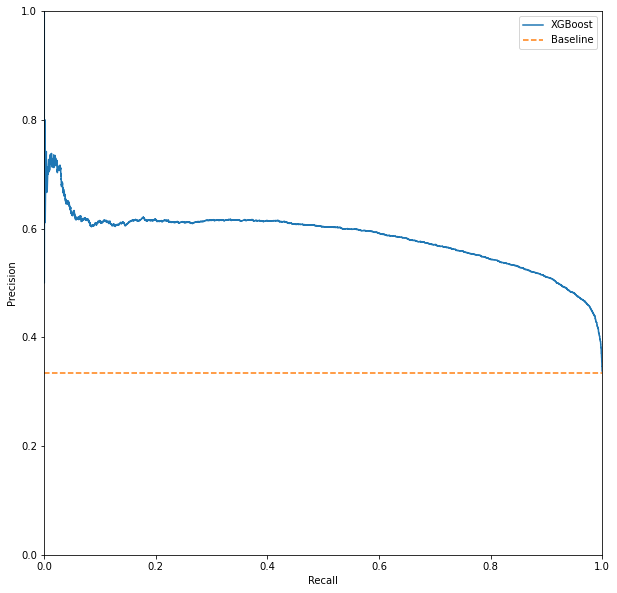

0.40025575447570333 0.19477286869943994


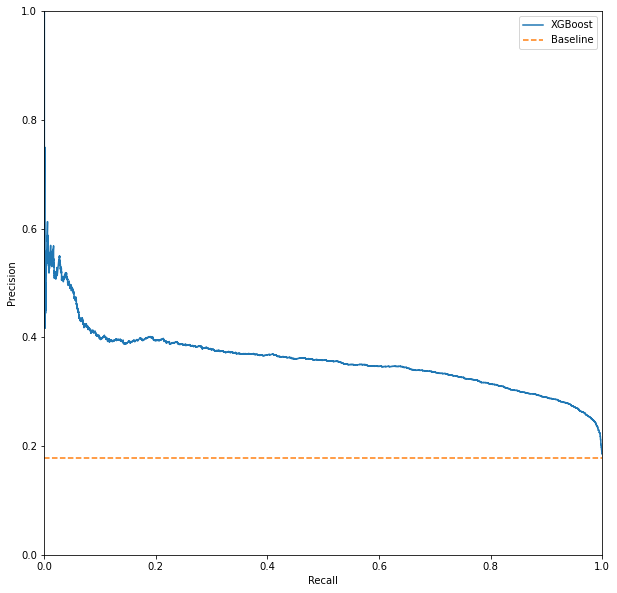

In [14]:
from sklearn.metrics import precision_recall_curve
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10, 10)

def pr_curve(thresh, preds):
    precision, recall, thresholds = precision_recall_curve(y_test > thresh, preds)
    
    precision_of_60 = np.argmax(precision>0.4)
    print(precision[precision_of_60], recall[precision_of_60])

    plt.plot(recall, precision, label='XGBoost')

    baseline = len(y_test[y_test > thresh]) / len(y_test)
    plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')

    plt.legend()
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    
pr_curve(0, preds)
pr_curve(1, preds)
# pr_curve(2, preds)
# pr_curve(3, preds)
# pr_curve(4, preds)
# pr_curve(5, preds)

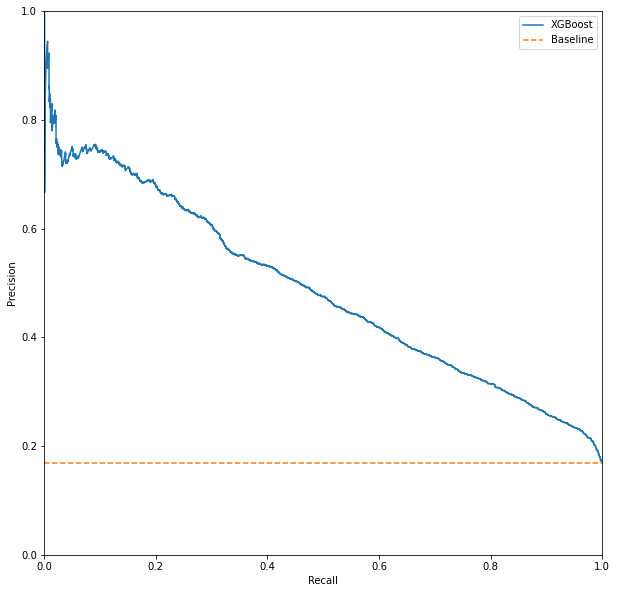

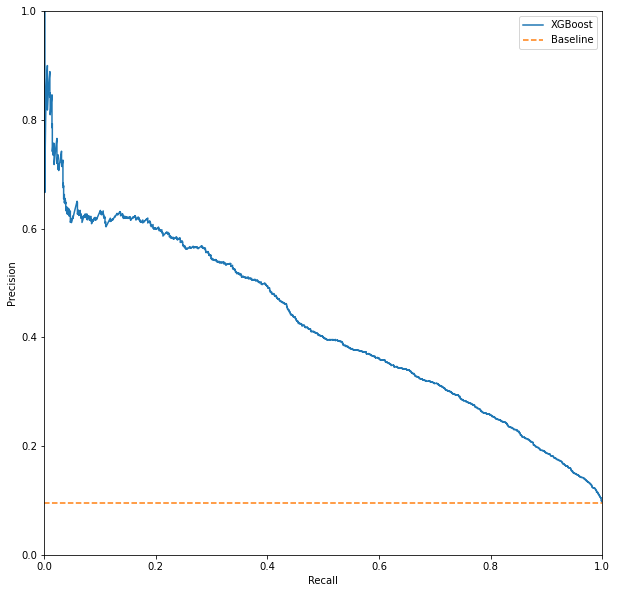

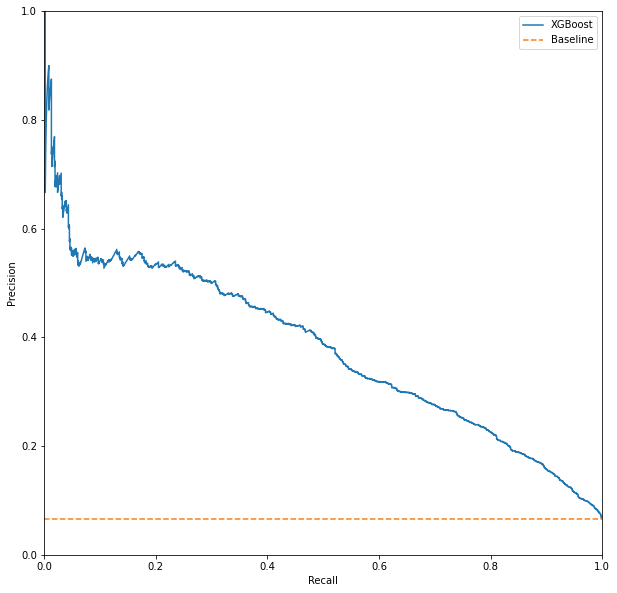

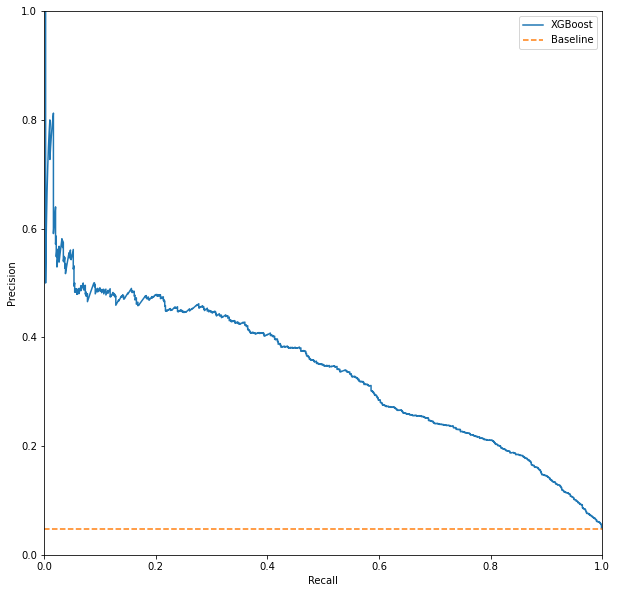

In [564]:
from sklearn.metrics import precision_recall_curve
matplotlib.rcParams['figure.figsize'] = (10, 10)

def pr_curve(thresh, preds):
    precision, recall, thresholds = precision_recall_curve(y_test > thresh, preds)

    plt.plot(recall, precision, label='XGBoost')

    baseline = len(y_test[y_test > thresh]) / len(y_test)
    plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')

    plt.legend()
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    
pr_curve(0, preds)
pr_curve(1, preds)
pr_curve(2, preds)
pr_curve(3, preds)

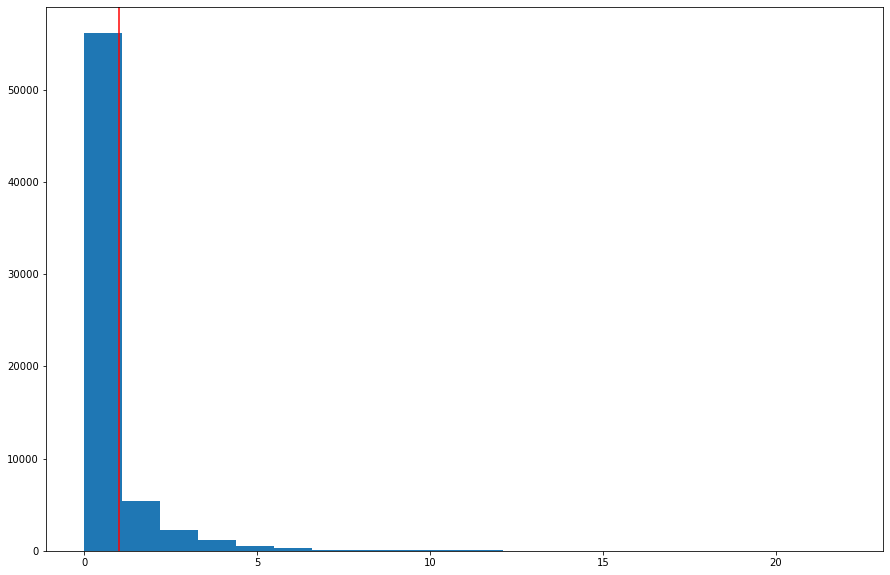

In [174]:
plt.hist(y_train, bins=20)
plt.axvline(x=1, color='red')

In [153]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

space={'max_depth': hp.quniform("max_depth", 2, 10, 1),
       'gamma': hp.uniform ('gamma', 1,9),
       'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
       'reg_lambda' : hp.uniform('reg_lambda', 0,1),
       'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
       'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
       'n_estimators': 10000,
       'learning_rate' : hp.quniform('learning_rate', 1e-2, 1e-1, 1e-2),
      }

In [124]:
# Classifier:
def hyperparameter_tuning(space):
    new_model = XGBClassifier(n_estimators=space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']), min_child_weight=space['min_child_weight'],
                         colsample_bytree=space['colsample_bytree'], learning_rate=space['learning_rate'])
    
    # threshold
    selection = SelectFromModel(model, threshold=np.flip(thresholds[thresholds > 0]), prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)
    # thresh end
    
    evaluation = [(select_X_train, y_train > 0), (select_X_test, y_test > 0)]
    
    new_model.fit(select_X_train, y_train > 0,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=20, verbose=False)

    pred = new_model.predict_proba(select_X_test)[:, 1]
    auroc = roc_auc_score(y_test > 0, pred)
    print ("SCORE:", auroc)
    #change the metric if you like
    return {'loss': -auroc, 'status': STATUS_OK, 'model': model}

In [125]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print (best)

SCORE:                                                                          
0.7810172506435885                                                              
SCORE:                                                                          
0.7763762602400455                                                              
SCORE:                                                                          
0.7822382398553879                                                              
SCORE:                                                                          
0.7752516697192484                                                              
SCORE:                                                                          
0.781905527404413                                                               
SCORE:                                                                          
0.7835317954972342                                                              
SCORE:                      

KeyboardInterrupt: 

In [484]:
(y_test > 0).sum() / len(y_test)

0.1679951690821256

In [9]:
y_test.reshape(-1, 60).sum(axis=-1)[:-1]

array([150, 102, 147, 117,  86, 113,  93, 115,  82,  90, 102,  82,  98,
        99, 144,  92,  97, 100, 103,  87,  85, 116, 102, 102,  95,  88,
        80,  97, 140,  97, 140,  92, 118, 129, 191, 172, 170, 137, 203,
       150, 119, 195, 156, 129, 187, 141, 168, 125, 152, 156, 150, 142,
       177, 187, 185, 189, 163, 179, 200, 184, 230, 121, 197, 206, 198,
       175, 229, 208, 156, 250, 181, 168, 218, 171, 189, 121, 185, 135,
       185, 129, 233, 178, 160, 189, 163, 144, 163, 165, 200, 155, 198,
       147, 135, 178, 135])

In [313]:
N = 3
cumsum, moving_aves = [0], []

for i, x in enumerate(y_train, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
    else:
        moving_ave = cumsum[i] / i
    moving_aves.append(moving_ave)

moving_aves_train = np.array([0] + moving_aves[:-1])
# moving_aves_train = np.array(moving_aves)

cumsum, moving_aves = [0], []

for i, x in enumerate(y_test, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
    else:
        moving_ave = cumsum[i] / i
    moving_aves.append(moving_ave)
    
moving_aves_test = np.array([0] + moving_aves[:-1])
moving_aves_test = np.array(moving_aves)

In [450]:
# X_train_appended = 
X_train_appended = np.vstack((X_train.swapaxes(0, 1), moving_aves_train)).swapaxes(0, 1)
X_test_appended = np.vstack((X_test.swapaxes(0, 1), moving_aves_test)).swapaxes(0, 1)

In [16]:
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

N = 300
cumsum, moving_aves2 = [0], []

for i, x in enumerate(model.predict(X_test), 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
    else:
        moving_ave = cumsum[i] / i
    moving_aves2.append(moving_ave)

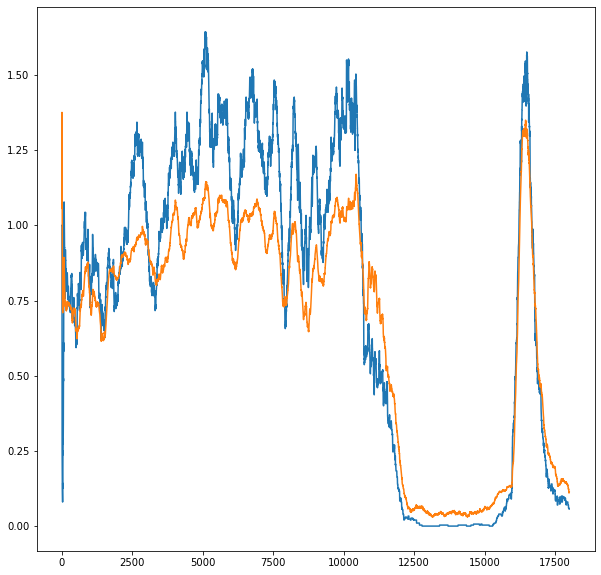

In [17]:
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

N = 300
cumsum, moving_aves = [0], []

for i, x in enumerate(y_test, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
    else:
        moving_ave = cumsum[i] / i
    moving_aves.append(moving_ave)

plt.plot(moving_aves)
plt.plot(moving_aves2)

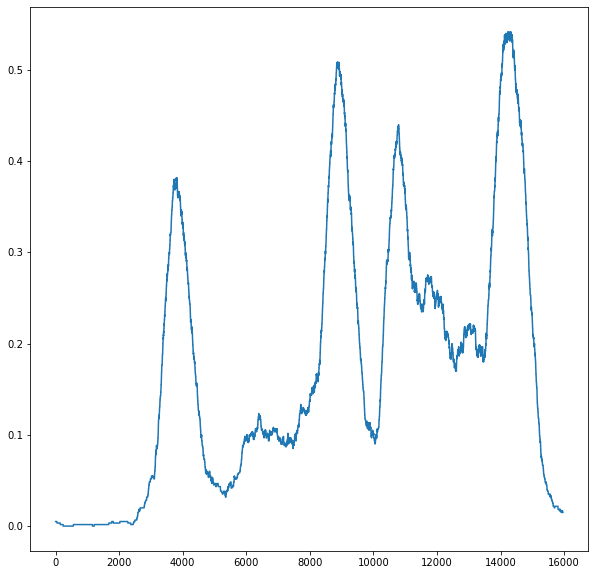

In [453]:
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

N = 600
cumsum, moving_aves = [0], []

for i, x in enumerate(y_test > 0, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)

plt.plot(moving_aves)

In [245]:
(y_test > 0).sum() / len(y_test)

0.1679951690821256

In [10]:
model = XGBRegressor(max_depth=2, n_estimators=1000, learning_rate=1e-1)

eval_set = [(X_test, y_test)]
# eval_set = [(X_test, y_cluster_test)]

model.fit(X_train, y_train, eval_metric="mae", \
          early_stopping_rounds=20, eval_set=eval_set, \
          verbose=True)

[0]	validation_0-mae:1.12584
[1]	validation_0-mae:1.11673
[2]	validation_0-mae:1.11093
[3]	validation_0-mae:1.10513
[4]	validation_0-mae:1.10382
[5]	validation_0-mae:1.10605
[6]	validation_0-mae:1.10384
[7]	validation_0-mae:1.10324
[8]	validation_0-mae:1.10242
[9]	validation_0-mae:1.10008
[10]	validation_0-mae:1.09850
[11]	validation_0-mae:1.09647
[12]	validation_0-mae:1.09547
[13]	validation_0-mae:1.09507
[14]	validation_0-mae:1.09367
[15]	validation_0-mae:1.09368
[16]	validation_0-mae:1.09339
[17]	validation_0-mae:1.09215
[18]	validation_0-mae:1.09245
[19]	validation_0-mae:1.09214
[20]	validation_0-mae:1.09247
[21]	validation_0-mae:1.09134
[22]	validation_0-mae:1.09073
[23]	validation_0-mae:1.09018
[24]	validation_0-mae:1.09082
[25]	validation_0-mae:1.09075
[26]	validation_0-mae:1.09084
[27]	validation_0-mae:1.09046
[28]	validation_0-mae:1.08960
[29]	validation_0-mae:1.08925
[30]	validation_0-mae:1.08837
[31]	validation_0-mae:1.08837
[32]	validation_0-mae:1.08774
[33]	validation_0-ma

[268]	validation_0-mae:1.04193
[269]	validation_0-mae:1.04197
[270]	validation_0-mae:1.04196
[271]	validation_0-mae:1.04192
[272]	validation_0-mae:1.04192
[273]	validation_0-mae:1.04177
[274]	validation_0-mae:1.04180
[275]	validation_0-mae:1.04185
[276]	validation_0-mae:1.04177
[277]	validation_0-mae:1.04172
[278]	validation_0-mae:1.04176
[279]	validation_0-mae:1.04174
[280]	validation_0-mae:1.04156
[281]	validation_0-mae:1.04160
[282]	validation_0-mae:1.04161
[283]	validation_0-mae:1.04171
[284]	validation_0-mae:1.04165
[285]	validation_0-mae:1.04143
[286]	validation_0-mae:1.04131
[287]	validation_0-mae:1.04110
[288]	validation_0-mae:1.04107
[289]	validation_0-mae:1.04103
[290]	validation_0-mae:1.04106
[291]	validation_0-mae:1.04089
[292]	validation_0-mae:1.04088
[293]	validation_0-mae:1.04085
[294]	validation_0-mae:1.04086
[295]	validation_0-mae:1.04086
[296]	validation_0-mae:1.04089
[297]	validation_0-mae:1.04081
[298]	validation_0-mae:1.04065
[299]	validation_0-mae:1.04053
[300]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [247]:
recall_score(y_test > 0, dummy.predict(X_test))

0.5050323508267434

In [260]:
average_precision_score(y_test > 0, ensemble_preds), average_precision_score(y_test > 0, gbm.predict_proba(X_test)[:, 1])

(0.4339063921402049, 0.43953166177689434)

In [424]:
import time

start = time.time()

for i in range(100):
    gbm.predict(np.expand_dims(X_test[0], 0))

print(time.time() - start)

0.07152295112609863


In [10]:
from sklearn.metrics import average_precision_score

# dummy = DummyClassifier(strategy='uniform').fit(X_test, y_test > 0)

# average_precision_score(y_test > 0, preds)#, \
# average_precision_score(y_test > 0, dummy.predict(X_test))

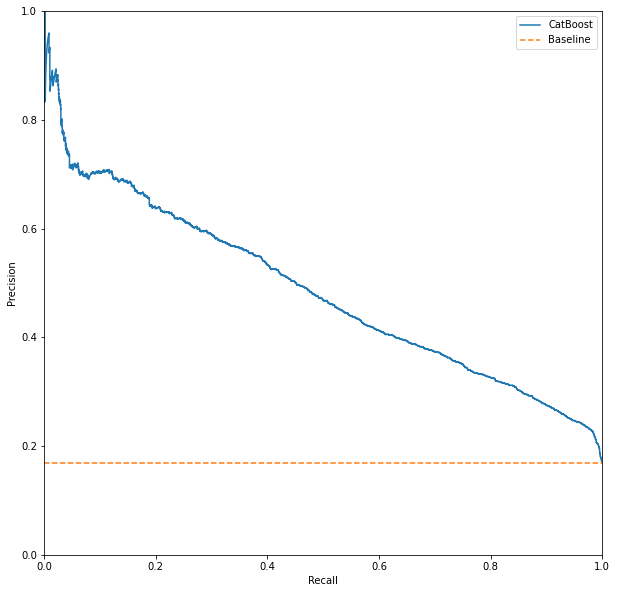

In [344]:
from sklearn.metrics import precision_recall_curve

matplotlib.rcParams['figure.figsize'] = (10, 10)

precision, recall, thresholds = precision_recall_curve(y_test > 0, model.predict_proba(X_test_detected)[:, 1])

plt.plot(recall, precision, label='CatBoost')

baseline = len(y_test[y_test > 0]) / len(y_test)
plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')

plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

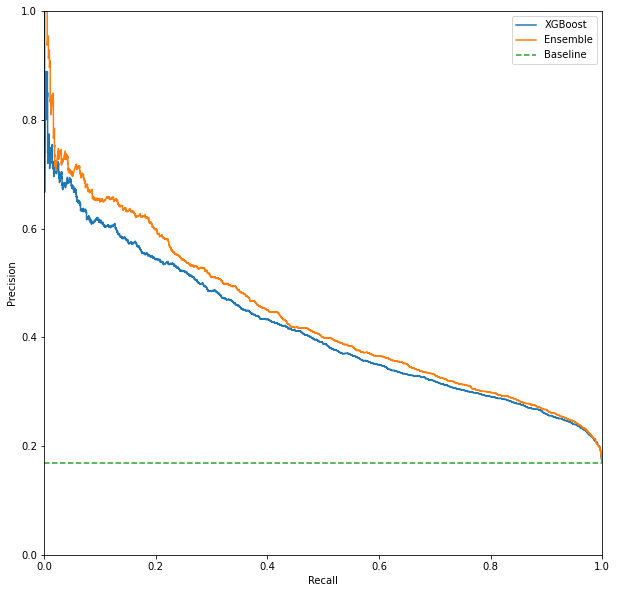

In [342]:
from sklearn.metrics import precision_recall_curve

matplotlib.rcParams['figure.figsize'] = (10, 10)

precision, recall, thresholds = precision_recall_curve(y_test > 0, model.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, label='XGBoost')

precision, recall, thresholds = precision_recall_curve(y_test > 0, gbm.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, label='Ensemble')

baseline = len(y_test[y_test > 0]) / len(y_test)
plt.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')

plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

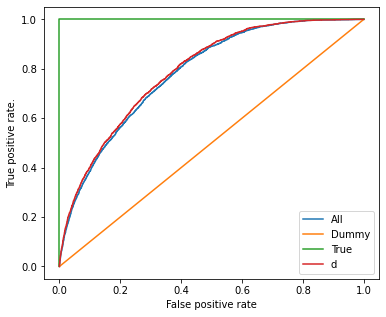

In [255]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (6, 5)

from sklearn.metrics import roc_curve
                             
def plotROC(tprs, fprs, labels=''):
    """
    Plot ROC curve from tpr and fpr.
    """
    for tpr, fpr, label in zip(tprs, fprs, labels):
        plt.plot(fpr, tpr, label=label)
        plt.plot()
        plt.legend()
        plt.ylabel('True positive rate.')
        plt.xlabel('False positive rate')
    plt.show()
    
ensemble_preds = (model.predict_proba(X_test)[:, 1] + gbm.predict_proba(X_test)[:, 1]) / 2

fpr1, tpr1, thresh = roc_curve(y_test > 0, selection_model.predict_proba(select_X_test)[:, 1])
fpr2, tpr2, thresh = roc_curve(y_test > 0, model.predict_proba(X_test)[:, 1])
fpr3, tpr3, thresh = roc_curve(y_test > 0, dummy.predict_proba(X_test)[:, 1])
fpr4, tpr4, thresh = roc_curve(y_test > 0, y_test > 0)
fpr5, tpr5, thresh = roc_curve(y_test > 0, ensemble_preds)
plotROC([tpr2, tpr3, tpr4, tpr5], [fpr2, fpr3, fpr4, fpr5], labels=['All', 'Dummy', 'True', 'd'])

In [347]:
thresh = 0.5

recall_score(gbm.predict_proba(X_test)[:, 1] > thresh, y_test > 0), \
precision_score(gbm.predict_proba(X_test)[:, 1] > thresh, y_test > 0)

(0.5980603448275862, 0.19949676491732565)

In [345]:
thresh = 0.4

recall_score(model.predict_proba(X_test)[:, 1] > thresh, y_test > 0), \
precision_score(model.predict_proba(X_test)[:, 1] > thresh, y_test > 0)

(0.5922330097087378, 0.13156002875629044)

In [594]:
i = 275
average_precision_score(y_test[i * 60:(i+1) * 60] > 0, preds[i * 60:(i+1) * 60])

0.11011904761904762

0.8079710144927537

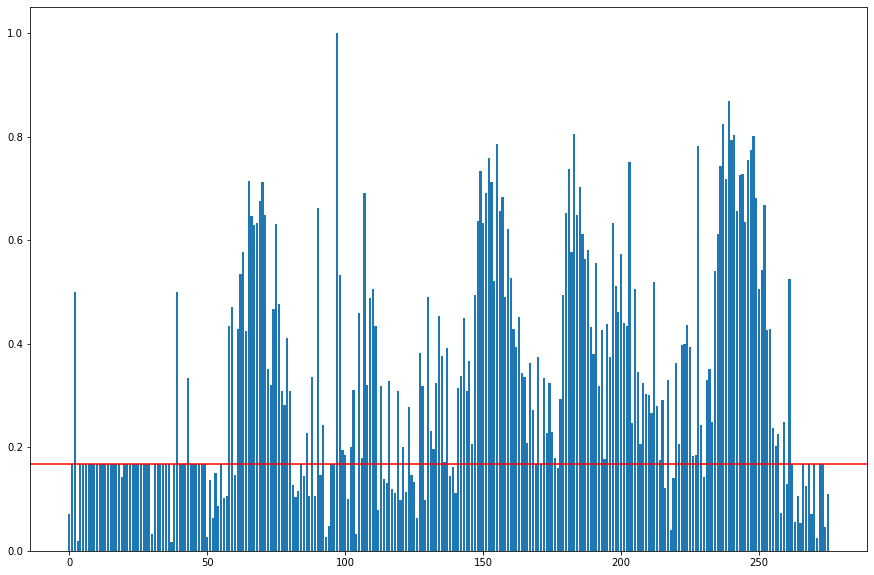

In [606]:
matplotlib.rcParams['figure.figsize'] = (15, 10)

baseline_score = (y_test > 0).mean()

roc_scores = []
for i in range(276):#len(y_test)):
    if (y_test[i * 60:(i+1) * 60] > 0).sum() == 0:
        roc_scores.append(baseline_score)
    else:
        roc_scores.append(average_precision_score(y_test[i * 60:(i+1) * 60] > 0, preds[i * 60:(i+1) * 60]))
plt.bar(range(len(roc_scores)), roc_scores)
plt.axhline(y=baseline_score, color='r', linestyle='-')

len([roc for roc in roc_scores if roc >= baseline_score]) / len(roc_scores)

In [210]:
from sklearn.metrics import average_precision_score

dummy = DummyClassifier(strategy='uniform').fit(X_test, y_test > 0)

average_precision_score(y_test > 0, model.predict_proba(X_test)[:, 1]), \
average_precision_score(y_test > 0, dummy.predict(X_test))

(0.4163948587462019, 0.1695771545022777)

In [32]:
sample_weight = compute_sample_weight('balanced', y_train > 2)

model = XGBClassifier(max_depth=2, n_estimators=10, learning_rate=1e-1)

eval_set = [(X_test, y_test > 0)]
# eval_set = [(X_test, y_cluster_test)]

model.fit(X_train, y_train > 0, eval_metric="auc", \
          early_stopping_rounds=20, eval_set=eval_set, \
          verbose=True)#, sample_weight=sample_weight)

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.60110
[1]	validation_0-auc:0.60455
[2]	validation_0-auc:0.61159
[3]	validation_0-auc:0.63846
[4]	validation_0-auc:0.65010
[5]	validation_0-auc:0.65658
[6]	validation_0-auc:0.66634
[7]	validation_0-auc:0.66912
[8]	validation_0-auc:0.68330
[9]	validation_0-auc:0.69584


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [120]:
from sklearn.feature_selection import SelectFromModel
from tqdm import tqdm
import warnings

warnings.filterwarnings(action='ignore', category=UserWarning)

thresholds = np.sort(model.feature_importances_)
scores = []

for thresh in tqdm(np.flip(thresholds[thresholds > 0])[:100]):
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    select_X_test = selection.transform(X_test)
    eval_set = [(select_X_test, y_test > 0)]
    # train model
    selection_model = XGBClassifier(max_depth=2, n_estimators=1000, learning_rate=1e-1, use_label_encoder=False)
    selection_model.fit(select_X_train, y_train > 0, eval_metric="auc", \
                        early_stopping_rounds=20, eval_set=eval_set, \
                        verbose=False)#, sample_weight=sample_weight)
    scores.append(roc_auc_score(y_test > 0, selection_model.predict_proba(select_X_test)[:, 1]))

100%|█████████████████████████████████████████| 100/100 [16:08<00:00,  9.69s/it]


In [122]:
np.array(scores).max(), np.array(scores).argmax()

(0.7861780895767423, 74)

In [363]:
thresh = 2

selection = SelectFromModel(model, threshold=np.flip(thresholds[thresholds > 0])[26], prefit=True)
select_X_train = selection.transform(X_train)

select_X_test = selection.transform(X_test)
eval_set = [(select_X_test, y_test > thresh)]
# train model
selection_model = XGBClassifier(n_estimators=180, max_depth = int(best['max_depth']), gamma = best['gamma'],
                         reg_alpha = int(best['reg_alpha']), min_child_weight=best['min_child_weight'],
                         colsample_bytree=best['colsample_bytree'], learning_rate=best['learning_rate'])
selection_model.fit(select_X_train, y_train > thresh, eval_metric="auc", \
                    early_stopping_rounds=20, eval_set=eval_set, \
                    verbose=False)#, sample_weight=sample_weight)
print(roc_auc_score(y_test > thresh, selection_model.predict_proba(select_X_test)[:, 1]))

0.6654079552072905


In [ ]:
from sklearn.metrics import roc_auc_score

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'is_unbalance': True,
    'metric': ['average_precision'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

gbm = lgb.LGBMClassifier(**hyper_params)

gbm.fit(X_train, y_train > 0,
        eval_set=[(X_test, y_test > 0)],
        eval_metric='average_precision',
        early_stopping_rounds=100)

[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.042746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] fe

In [38]:
from sklearn.metrics import roc_auc_score

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'is_unbalance': True,
    'metric': ['f1'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

gbm = lgb.LGBMClassifier(**hyper_params)

gbm.fit(X_train, y_train > 0,
        eval_set=[(X_test, y_test > 0)],
        eval_metric='auc',
        early_stopping_rounds=100)

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.949190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] fe

LGBMClassifier(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
               is_unbalance=True, learning_rate=0.005, max_bin=512, max_depth=8,
               metric=['f1'], n_estimators=1000, num_iterations=100000,
               num_leaves=128, objective='binary', task='train', verbose=0)

In [76]:
from sklearn.metrics import roc_auc_score

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'is_unbalance': True,
    'metric': ['auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

gbm = lgb.LGBMClassifier(**hyper_params)

gbm.fit(X_train, y_train > 0,
        eval_set=[(X_test, y_test > 0)],
        eval_metric='auc',
        early_stopping_rounds=100)

/Users/jamienorris/miniconda3/envs/lightgbm/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.127826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] fe

[237]	valid_0's auc: 0.779729
[238]	valid_0's auc: 0.779752
[239]	valid_0's auc: 0.779769
[240]	valid_0's auc: 0.779795
[241]	valid_0's auc: 0.779767
[242]	valid_0's auc: 0.779844
[243]	valid_0's auc: 0.779823
[244]	valid_0's auc: 0.779893
[245]	valid_0's auc: 0.77988
[246]	valid_0's auc: 0.779886
[247]	valid_0's auc: 0.77986
[248]	valid_0's auc: 0.779962
[249]	valid_0's auc: 0.779982
[250]	valid_0's auc: 0.780011
[251]	valid_0's auc: 0.78009
[252]	valid_0's auc: 0.780147
[253]	valid_0's auc: 0.780208
[254]	valid_0's auc: 0.780303
[255]	valid_0's auc: 0.780362
[256]	valid_0's auc: 0.780441
[257]	valid_0's auc: 0.780477
[258]	valid_0's auc: 0.780444
[259]	valid_0's auc: 0.780474
[260]	valid_0's auc: 0.78052
[261]	valid_0's auc: 0.780567
[262]	valid_0's auc: 0.780553
[263]	valid_0's auc: 0.780538
[264]	valid_0's auc: 0.780547
[265]	valid_0's auc: 0.780593
[266]	valid_0's auc: 0.780563
[267]	valid_0's auc: 0.780595
[268]	valid_0's auc: 0.780643
[269]	valid_0's auc: 0.780673
[270]	valid_0'

[494]	valid_0's auc: 0.786634
[495]	valid_0's auc: 0.786663
[496]	valid_0's auc: 0.786718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[497]	valid_0's auc: 0.78675
[498]	valid_0's auc: 0.786786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[499]	valid_0's auc: 0.786815
[500]	valid_0's auc: 0.786819
[501]	valid_0's auc: 0.786847
[502]	valid_0's auc: 0.786924
[503]	valid_0's auc: 0.786944
[504]	valid_0's auc: 0.786969
[505]	valid_0's auc: 0.78701
[506]	valid_0's auc: 0.786997
[507]	valid_0's auc: 0.787041
[508]	valid_0's auc: 0.787066
[509]	valid_0's auc: 0.787138
[510]	valid_0's auc: 0.787189
[511]	valid_0's auc: 0.787246
[512]	valid_0's auc: 0.787277
[513]	valid_0's auc: 0.787318
[514]	valid_0's auc: 0.787362
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[515]	valid_0's auc: 0.787391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[516]	valid_0's auc: 0.787405
[LightGBM] [

[648]	valid_0's auc: 0.788408
[649]	valid_0's auc: 0.788431
[650]	valid_0's auc: 0.78846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[651]	valid_0's auc: 0.788472
[652]	valid_0's auc: 0.788458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[653]	valid_0's auc: 0.788441
[654]	valid_0's auc: 0.788423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[655]	valid_0's auc: 0.788461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[656]	valid_0's auc: 0.78846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[657]	valid_0's auc: 0.788476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[658]	valid_0's auc: 0.788512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[659]	valid_0's auc: 0.788537
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[660]	valid_0's auc: 0.788521
[661]	valid_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[749]	valid_0's auc: 0.789258
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[750]	valid_0's auc: 0.789274
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[751]	valid_0's auc: 0.78928
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[752]	valid_0's auc: 0.789276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[753]	valid_0's auc: 0.789265
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[754]	valid_0's auc: 0.789275
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[755]	valid_0's auc: 0.789283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[756]	valid_0's auc: 0.789284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[757]	valid_0's auc: 0.789285
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[857]	valid_0's auc: 0.789612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[858]	valid_0's auc: 0.789616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[859]	valid_0's auc: 0.789618
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[860]	valid_0's auc: 0.789597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[861]	valid_0's auc: 0.789575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[862]	valid_0's auc: 0.789542
[863]	valid_0's auc: 0.789497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[864]	valid_0's auc: 0.789488
[865]	valid_0's auc: 0.789476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[866]	valid_0's auc: 0.789465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[867]	valid_0's auc: 0.78

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[948]	valid_0's auc: 0.79001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[949]	valid_0's auc: 0.790013
[950]	valid_0's auc: 0.790009
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[951]	valid_0's auc: 0.790014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[952]	valid_0's auc: 0.790003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[953]	valid_0's auc: 0.790005
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[954]	valid_0's auc: 0.790024
[955]	valid_0's auc: 0.790008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[956]	valid_0's auc: 0.790015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[957]	valid_0's auc: 0.790005
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[958]	valid_0's auc: 0.790

[1065]	valid_0's auc: 0.790638
[1066]	valid_0's auc: 0.79066
[1067]	valid_0's auc: 0.790652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1068]	valid_0's auc: 0.790658
[1069]	valid_0's auc: 0.790662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1070]	valid_0's auc: 0.790654
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1071]	valid_0's auc: 0.790654
[1072]	valid_0's auc: 0.790674
[1073]	valid_0's auc: 0.790681
[1074]	valid_0's auc: 0.790672
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1075]	valid_0's auc: 0.790691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1076]	valid_0's auc: 0.790676
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1077]	valid_0's auc: 0.790674
[1078]	valid_0's auc: 0.790683
[1079]	valid_0's auc: 0.790684
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1080]	vali

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1173]	valid_0's auc: 0.790932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1174]	valid_0's auc: 0.790925
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1175]	valid_0's auc: 0.790913
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1176]	valid_0's auc: 0.790909
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1177]	valid_0's auc: 0.790897
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1178]	valid_0's auc: 0.790894
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1179]	valid_0's auc: 0.790867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1180]	valid_0's auc: 0.790852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1181]	valid_0's auc: 0.790835
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1268]	valid_0's auc: 0.791043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1269]	valid_0's auc: 0.791033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1270]	valid_0's auc: 0.791025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1271]	valid_0's auc: 0.791024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1272]	valid_0's auc: 0.791035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1273]	valid_0's auc: 0.791035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1274]	valid_0's auc: 0.79103
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1275]	valid_0's auc: 0.791033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1276]	valid_0's auc: 0.791032
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1362]	valid_0's auc: 0.790964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1363]	valid_0's auc: 0.790978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1364]	valid_0's auc: 0.790991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1365]	valid_0's auc: 0.790962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1366]	valid_0's auc: 0.790966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1367]	valid_0's auc: 0.790975
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1368]	valid_0's auc: 0.790977
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1369]	valid_0's auc: 0.790966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1370]	valid_0's auc: 0.790975
[1371]	valid_0's auc: 0.790987
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1462]	valid_0's auc: 0.791253
[1463]	valid_0's auc: 0.791261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1464]	valid_0's auc: 0.791242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1465]	valid_0's auc: 0.791233
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1466]	valid_0's auc: 0.791235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1467]	valid_0's auc: 0.791226
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1468]	valid_0's auc: 0.791215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1469]	valid_0's auc: 0.791225
[1470]	valid_0's auc: 0.79121
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1471]	valid_0's auc: 0.791196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1472]	valid_0's

[1551]	valid_0's auc: 0.791484
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1552]	valid_0's auc: 0.791473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1553]	valid_0's auc: 0.791475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1554]	valid_0's auc: 0.791469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1555]	valid_0's auc: 0.79146
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1556]	valid_0's auc: 0.791446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1557]	valid_0's auc: 0.791439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1558]	valid_0's auc: 0.791458
[1559]	valid_0's auc: 0.791452
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1560]	valid_0's auc: 0.791449
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1561]	valid_0's

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1658]	valid_0's auc: 0.791969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1659]	valid_0's auc: 0.791989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1660]	valid_0's auc: 0.791981
[1661]	valid_0's auc: 0.79197
[1662]	valid_0's auc: 0.791978
[1663]	valid_0's auc: 0.791953
[1664]	valid_0's auc: 0.791975
[1665]	valid_0's auc: 0.791994
[1666]	valid_0's auc: 0.792011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1667]	valid_0's auc: 0.792018
[1668]	valid_0's auc: 0.79201
[1669]	valid_0's auc: 0.792016
[1670]	valid_0's auc: 0.792025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1671]	valid_0's auc: 0.792003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1672]	valid_0's auc: 0.791978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1673]	valid

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1769]	valid_0's auc: 0.791437
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1770]	valid_0's auc: 0.791433
Early stopping, best iteration is:
[1670]	valid_0's auc: 0.792025


LGBMClassifier(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
               is_unbalance=True, learning_rate=0.005, max_bin=512, max_depth=8,
               metric=['auc'], n_estimators=1000, num_iterations=100000,
               num_leaves=128, objective='binary', task='train', verbose=0)

In [38]:
f1_score(gbm.predict(X_test), y_test > 5), confusion_matrix(gbm.predict(X_test), y_test > 5)

AttributeError: 'NoneType' object has no attribute 'predict'

In [77]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train > 0)

RandomForestClassifier(max_depth=2, random_state=0)

In [79]:
roc_auc_score(y_test > 0, clf.predict_proba(X_test)[:, 1])

0.723862440659366

In [69]:
from sklearn.dummy import DummyClassifier
# (strategy='uniform') 

dummy = DummyClassifier(strategy='uniform').fit(X_train, y_train > 2)

roc_auc_score(dummy.predict(X_test), y_test > 2), confusion_matrix(dummy.predict(X_test), y_test > 5)

(0.506317168108554,
 array([[2773,  148],
        [2721,  118]]))